# Product Recommendation System For E-commerce 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

## Loading the dataset 

In [2]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

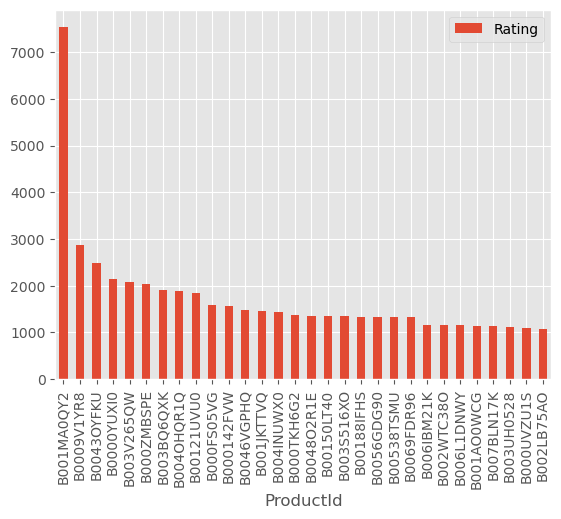

In [5]:
most_popular.head(30).plot(kind = "bar")

### The above graph gives us the most popular product sold by the businesss in the descending order also it has conclude that product ID # B001MA0QY2 has sales of over 7000. 

## Now using the collaborative filtering method and using the Utility Matrix based on products sold and user reviews

In [6]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [7]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [8]:
ratings_utility_matrix.shape

(9697, 886)

### Transposing the matrix

In [9]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.shape

(886, 9697)

##### Unique products in subset of data

In [11]:
X1 = X

### Decomposing the Matrix 

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix 

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

####  Isolating Product ID # 6117036094 from the Correlation Matrix
Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [14]:
X.index[99]

'6117036094'

##### Index # of product ID purchased by customer

In [15]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [16]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [17]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '1304482634',
 '1457982633',
 '3227001381',
 '4057363823',
 '5357955786',
 '5357955905',
 '5357956227',
 '6053640972']

### Product ID # Here are the top 10 products that will suggest to the customer on their past purchase history on website

###### For a business without any user-item purchase history, a search engine based recommended system can be designed for users.The product recommendations can be based on textual clustering analysis given in product description.

In [18]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

####  Item to item based recommendation system based on product description
Applicable when business is setting up its E-commerce website for the first time

In [19]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [20]:
# Missing valuesproduct_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [21]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizing product clusters in subset of data

C:\Users\Adesh.Chaudhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


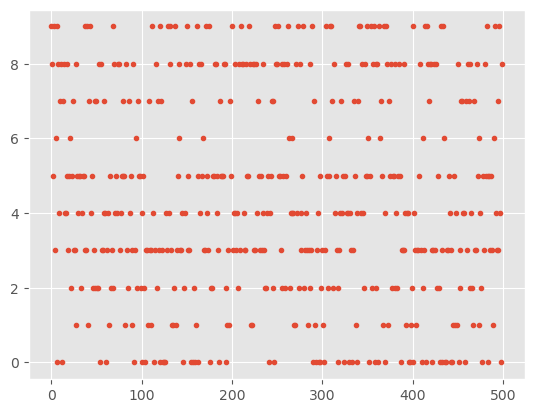

In [23]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [24]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

###  Output
Recommendation of product based on the current product selected by user.
To recommend related product based on, Frequently bought together.

##### Top words in each cluster based on product description

In [25]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 concrete
 vary
 cement
 product
 epoxy
 use
 stake
 designed
 lb
 store
Cluster 1:
 air
 water
 control
 cooling
 ft
 cycle
 oven
 energy
 wash
 cooking
Cluster 2:
 door
 wood
 painted
 proposition
 nbsp
 residents
 california
 65
 primed
 moulding
Cluster 3:
 ft
 aluminum
 easy
 window
 finish
 patio
 snow
 10
 cover
 natural
Cluster 4:
 frame
 light
 collection
 patio
 dining
 nickel
 outdoor
 watt
 design
 hardware
Cluster 5:
 power
 volt
 light
 saw
 battery
 tool
 watt
 led
 lithium
 protection
Cluster 6:
 wall
 storage
 panels
 shelves
 lbs
 room
 home
 unit
 easy
 steel
Cluster 7:
 cutting
 easy
 blade
 tape
 grass
 pliers
 joe
 lightweight
 easily
 step
Cluster 8:
 toilet
 bowl
 flush
 water
 tank
 piece
 gal
 wax
 design
 home
Cluster 9:
 brush
 dust
 insulation
 tool
 nozzle
 cleaning
 floor
 vacuum
 air
 easy


### Predicting clusters based on key search words

In [26]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

######  Keyword : cutting tool

In [27]:
show_recommendations("cutting tool")

Cluster 7:
 cutting
 easy
 blade
 tape
 grass
 pliers
 joe
 lightweight
 easily
 step


##### Keyword : steel drill

In [28]:
show_recommendations("steel drill")

Cluster 1:
 air
 water
 control
 cooling
 ft
 cycle
 oven
 energy
 wash
 cooking


##### In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word. 
   keyword : Water

In [29]:
show_recommendations("water")

Cluster 1:
 air
 water
 control
 cooling
 ft
 cycle
 oven
 energy
 wash
 cooking


####  Based on the product descriptions, the recommendation system can show products from the corresponding product clusters once a cluster has been identified based on the user's search terms.

#####  In summary, this is most effective for businesses that are just starting out with their e-commerce website and do not have any user-item purchase or rating history. After a buyer has a history of purchases, the recommendation engine can apply the model-based collaborative filtering technique, which will help the users receive a good recommendation right away.
